In [33]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
import matplotlib.pyplot as plt

In [2]:
additional_stop_words = ['like', 'said', 'would', 'could', 'should', 'one']
my_stop_words = stop_words.union(additional_stop_words)
print(my_stop_words)

{'does', 'why', "she's", 'again', 'me', 'not', 'under', 'doesn', 'wasn', 'ma', 'my', 'mustn', 'one', 'at', 's', 'isn', 'a', 'yourself', 'nor', 'he', 'these', 'more', 'most', "doesn't", 'she', 'aren', 'his', 'too', "shan't", 'if', 'above', "mustn't", 'they', "needn't", "mightn't", 'hasn', 'between', 'i', 'would', 'y', 'is', 'have', 'so', 'haven', "weren't", "won't", "you'll", "haven't", "wouldn't", 'same', 'myself', 'once', "hasn't", 'yourselves', 'for', 'out', "that'll", 'm', 'themselves', "couldn't", 'in', 'any', 'who', 'other', 'ain', 'had', 'himself', 'now', 'into', 'the', 'no', 'yours', 'than', 'whom', 've', 'o', 'all', 'it', 'of', 'off', 'shan', "you're", 'mightn', 'just', 'as', 'itself', 'then', 'could', "should've", 'ourselves', 'what', 'we', 'such', 'own', 'below', 'hadn', 'here', 'said', 'or', 're', "aren't", 'before', "you'd", 'ours', 'him', 'until', 'hers', "it's", 'through', 'wouldn', "don't", 'from', 'there', 'couldn', 'should', 'while', 'that', 'needn', 'few', 'its', 'hav

In [51]:
# get counts and remove stop words
def vectorizeText(inputText, min_df=1, max_df=1.0):
    cv = CountVectorizer(stop_words=my_stop_words, min_df=min_df, max_df=max_df)
    X = cv.fit_transform(inputText)
    
    return X, cv

#     df_cv = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())  
#     df_cv.info()
#     print(df_cv.columns)
#     print(df_cv)

# get term frequencies and remove stop words
def vectorizeTextIDF(inputText, min_df=1, max_df=1.0):
    cv_tfidf = TfidfVectorizer(stop_words=my_stop_words, min_df=min_df, max_df=max_df)
    X_tfidf = cv_tfidf.fit_transform(inputText)
    
    return X_tfidf, cv_tfidf
    
#     df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=cv_tfidf.get_feature_names())
#     df_tfidf.info()
#     print(df_tfidf.columns)
#     print(df_tfidf)      



In [119]:
unpickled_df = pd.read_pickle("./sla_chapter_text.pkl")
unpickled_df

,chapter_text,book,chapter
0,prelud stormlight archiv kalak round rocki st...,1,1
1,love men frigid thing mountain stream three s...,1,2
2,kill bastard kill sun still hot die day week ...,1,3
3,ten order love forsaken us almighti shard sou...,1,4
4,man stood watch homeland fall dust water surg...,1,5
...,...,...,...
456,discard help potenti ﬁnal passion el ﬁrst fin...,4,127
457,ye look forward rule human el ﬁrst final ten ...,4,128
458,nearli much look forward serv newest odium re...,4,129
459,fourteen month ago eshonai hit ground chasm f...,4,130


In [123]:
unpickled_df.iloc[200:220]

,chapter_text,book,chapter
200,moment notwithstand honestli say book brew si...,3,9
201,sum experi point moment decis oathbring prefa...,3,10
202,perhap heresi stretch back day childhood idea...,3,11
203,thirti three year ago dalinar danc one foot m...,3,12
204,ask forgiv even understand oathbring prefac d...,3,13
205,ask read listen word oathbring prefac shallan...,3,14
206,record hold noth back tri shi away diﬃcult to...,3,15
207,express direct even brutal truth must know do...,3,16
208,come lesson oathbring prefac legend rest ston...,3,17
209,lesson claim abl teach experi great teacher m...,3,18


In [62]:
# look at vectorized text with various max_df and min_df options

points_x_min = []
points_y_min = []

for val in np.linspace(0, .2, 21):
    vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'], val, 1.0)
    
    print("low threshold: ", val, " features: ", vectorized_matrix.shape[1])
    vectorized_matrix.shape
    
    points_x_min.append(val)
    points_y_min.append(vectorized_matrix.shape[1])
    
#     if val < 0.01:
#     print(len(vectorizer.stop_words_))

low threshold:  0.0  features:  13384
low threshold:  0.01  features:  6484
low threshold:  0.02  features:  4670
low threshold:  0.03  features:  3961
low threshold:  0.04  features:  3381
low threshold:  0.05  features:  2972
low threshold:  0.06  features:  2725
low threshold:  0.07  features:  2473
low threshold:  0.08  features:  2312
low threshold:  0.09  features:  2121
low threshold:  0.1  features:  1963
low threshold:  0.11  features:  1846
low threshold:  0.12  features:  1715
low threshold:  0.13  features:  1619
low threshold:  0.14  features:  1525
low threshold:  0.15  features:  1436
low threshold:  0.16  features:  1373
low threshold:  0.17  features:  1301
low threshold:  0.18  features:  1239
low threshold:  0.19  features:  1179
low threshold:  0.2  features:  1095


In [93]:
points_x_max = []
points_y_max = []

for val in np.linspace(0.05, 1.0, 20):
#     vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'], 0.01, val)
    vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'], 1, val)
    
    print("high threshold: ", val, " features: ", vectorized_matrix.shape[1])
    vectorized_matrix.shape
    
    points_x_max.append(val)
    points_y_max.append(vectorized_matrix.shape[1])
    
    print(len(vectorizer.stop_words_))
    if val > .74:
        print(vectorizer.stop_words_)

high threshold:  0.05  features:  10412
2972
high threshold:  0.1  features:  11421
1963
high threshold:  0.15  features:  11948
1436
high threshold:  0.2  features:  12289
1095
high threshold:  0.25  features:  12493
891
high threshold:  0.3  features:  12661
723
high threshold:  0.35  features:  12790
594
high threshold:  0.39999999999999997  features:  12887
497
high threshold:  0.44999999999999996  features:  12963
421
high threshold:  0.49999999999999994  features:  13030
354
high threshold:  0.5499999999999999  features:  13094
290
high threshold:  0.6  features:  13152
232
high threshold:  0.65  features:  13196
188
high threshold:  0.7  features:  13236
148
high threshold:  0.75  features:  13277
107
{'forc', 'took', 'behind', 'pull', 'give', 'anoth', 'feel', 'take', 'eye', 'keep', 'step', 'long', 'good', 'part', 'know', 'besid', 'away', 'enough', 'might', 'way', 'mani', 'toward', 'last', 'move', 'around', 'call', 'think', 'far', 'knew', 'back', 'done', 'care', 'ask', 'without'

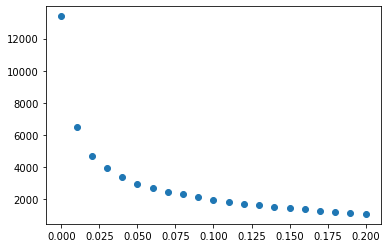

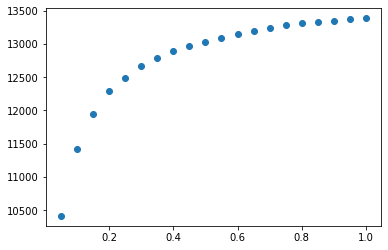

In [94]:
plt.figure()
plt.scatter(points_x_min, points_y_min)
plt.figure()
plt.scatter(points_x_max, points_y_max)

In [ ]:
# stop here

In [95]:
# vectorized_matrix, vectorizer = vectorizeText(unpickled_df['chapter_text'])
vectorized_matrix, vectorizer = vectorizeTextIDF(unpickled_df['chapter_text'], 0.01, 0.75)

In [116]:
# non-negative matrix factorization
nmf_model = NMF(6, random_state=84597)
doc_topic_matrix = nmf_model.fit_transform(vectorized_matrix)
print(doc_topic_matrix.shape)

topic_word_matrix = nmf_model.components_
print(topic_word_matrix.shape)

words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

(461, 6)
(6, 6377)


[['shallan', 'jasnah', 'veil', 'pattern', 'tyn', 'balat'],
 ['kaladin', 'teft', 'syl', 'bridg', 'moash', 'rock'],
 ['dalinar', 'sadea', 'navani', 'vision', 'gavilar', 'parshendi'],
 ['venli', 'eshonai', 'rhythm', 'human', 'attun', 'rlain'],
 ['adolin', 'veil', 'honorspren', 'sadea', 'duel', 'spren'],
 ['navani', 'raboniel', 'szeth', 'taravangian', 'sibl', 'tower']]

In [125]:
print(doc_topic_matrix[205])

[0.20295699 0.         0.         0.         0.1828269  0.        ]


In [97]:
max_k = 10
for k in range(1, max_k):
    print("Trying NMF with: ", k, " topics")
    nmf_model = NMF(k, random_state=84597)
    doc_topic_matrix = nmf_model.fit_transform(vectorized_matrix)
    topic_word_matrix = nmf_model.components_
    t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
    topic_words = [[words[e] for e in l] for l in t]
#     print(topic_words)
    
    for i in range(k):
        print("Topic %d:" % i, end='')
        for word in topic_words[i]:
            print(' %s' % word, end='')
        print()
        
    print()

Trying NMF with:  1  topics
Topic 0: kaladin dalinar shallan adolin navani jasnah

Trying NMF with:  2  topics
Topic 0: dalinar shallan adolin jasnah navani veil
Topic 1: kaladin teft syl bridg moash rock

Trying NMF with:  3  topics
Topic 0: shallan jasnah adolin veil pattern father
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar navani adolin sadea taravangian venli

Trying NMF with:  4  topics
Topic 0: shallan jasnah adolin veil pattern father
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar adolin navani sadea taravangian king
Topic 3: venli eshonai raboniel rhythm human navani

Trying NMF with:  5  topics
Topic 0: shallan jasnah veil pattern tyn balat
Topic 1: kaladin teft syl bridg moash rock
Topic 2: dalinar navani taravangian sadea vision gavilar
Topic 3: venli eshonai raboniel rhythm human rlain
Topic 4: adolin veil honorspren sadea duel spren

Trying NMF with:  6  topics
Topic 0: shallan jasnah veil pattern tyn balat
Topic 1: kaladin teft syl bridg moas

In [145]:
# kmeans clustering
k_clusters = 4

km = KMeans(n_clusters=k_clusters, init='k-means++', max_iter=100, n_init=10, random_state=425)
doc_clusters = km.fit_predict(vectorized_matrix)

order_centroids = km.cluster_centers_.argsort()[:,::-1]

for i in range(k_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % words[ind], end='')
    print()

Cluster 0: kaladin syl teft bridg adolin moash
Cluster 1: dalinar adolin navani sadea parshendi taravangian
Cluster 2: venli eshonai raboniel szeth navani rhythm
Cluster 3: shallan adolin jasnah veil pattern father


In [150]:
doc_clusters[205]

3

In [99]:
inertias = []
max_k = 10
for k in range(1, max_k):
    print("Trying kMeans clustering with: ", k, " clusters")
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=425)
    clusters = km.fit(vectorized_matrix)
    inertias.append(clusters.inertia_)    
    
    order_centroids = km.cluster_centers_.argsort()[:,::-1]

    for i in range(k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :6]:
            print(' %s' % words[ind], end='')
        print()
        
    print()

Trying kMeans clustering with:  1  clusters
Cluster 0: kaladin dalinar shallan adolin navani venli

Trying kMeans clustering with:  2  clusters
Cluster 0: kaladin syl teft bridg dalinar moash
Cluster 1: dalinar shallan adolin venli navani jasnah

Trying kMeans clustering with:  3  clusters
Cluster 0: shallan venli adolin jasnah veil eshonai
Cluster 1: kaladin teft syl bridg moash adolin
Cluster 2: dalinar navani adolin sadea parshendi taravangian

Trying kMeans clustering with:  4  clusters
Cluster 0: kaladin syl teft bridg adolin moash
Cluster 1: venli eshonai raboniel szeth navani rhythm
Cluster 2: dalinar adolin navani sadea parshendi taravangian
Cluster 3: shallan adolin jasnah veil pattern father

Trying kMeans clustering with:  5  clusters
Cluster 0: shallan adolin jasnah veil pattern father
Cluster 1: dalinar adolin navani sadea parshendi vision
Cluster 2: venli eshonai rhythm human raboniel attun
Cluster 3: navani szeth taravangian raboniel kal lirin
Cluster 4: kaladin syl teft

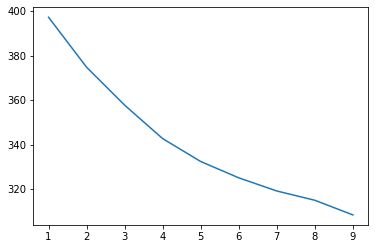

In [100]:
ks = [k for k in range(1,max_k)]
plt.plot(ks, inertias)

In [101]:
# get distances of points 
# distances  = 1 - cosine_similarity(vectorized_matrix) # same as just the cosine distance: D = 1 - S
distances  = cosine_distances(vectorized_matrix)

In [102]:
distances.shape

(461, 461)

In [103]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=232, max_iter=300, verbose=1)
positions_2d = mds.fit_transform(distances)
print('Final stress value: %f' %mds.stress_)


xs, ys = positions_2d[:, 0], positions_2d[:, 1]

breaking at iteration 206 with stress 10802.272497824946
Final stress value: 10230.095448


In [104]:
positions_2d.shape

(461, 2)

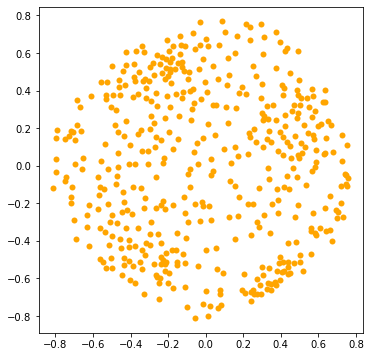

In [105]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(xs, ys, marker='o', markersize=6, linestyle='', color='orange', alpha=1.0, mec="none" ) 
ax.set_aspect('equal')


# ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
# ax.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')
# ax.set_xlim(-0.85,1.7)
# ax.set_ylim(-0.85,0.85)

plt.show()